In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [11]:
# Load the iris dataset
iris = sns.load_dataset("iris")

print(iris.sample(5))

     sepal_length  sepal_width  petal_length  petal_width     species
132           6.4          2.8           5.6          2.2   virginica
91            6.1          3.0           4.6          1.4  versicolor
73            6.1          2.8           4.7          1.2  versicolor
2             4.7          3.2           1.3          0.2      setosa
84            5.4          3.0           4.5          1.5  versicolor


    sepal_length  sepal_width  petal_length  petal_width  species
80           5.5          2.4           3.8          1.1        1
12           4.8          3.0           1.4          0.1        0
53           5.5          2.3           4.0          1.3        1
86           6.7          3.1           4.7          1.5        1
99           5.7          2.8           4.1          1.3        1


c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


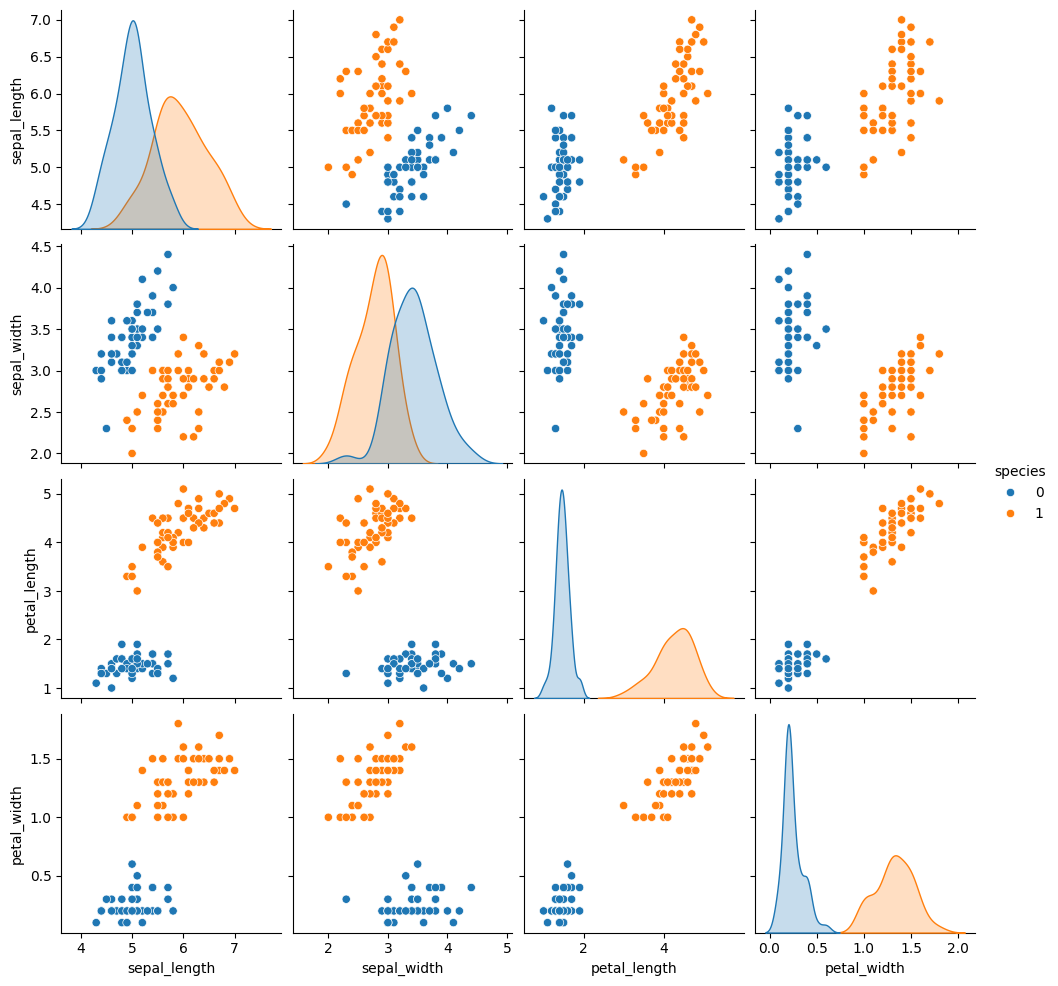

In [12]:
# Remove the 'virginica' class
iris = iris[iris['species'] != 'virginica']

# Encode the remaining classes ('setosa' and 'versicolor') as 0 and 1
label_encoder = LabelEncoder()
iris['species'] = label_encoder.fit_transform(iris['species'])

# Display the first few rows of the modified dataset
print(iris.sample(5))

# Create a pairplot to visualize the data
sns.pairplot(iris, hue="species")
plt.show()

# 'setosa' and 'versicolor' are marked with 0 and 1


In [14]:

# Separate the classes
class_0 = iris[iris['species'] == 0]
class_1 = iris[iris['species'] == 1]

# Calculate the mean vectors
mu_0 = class_0.iloc[:, :-1].mean().values.reshape(4, 1)
mu_1 = class_1.iloc[:, :-1].mean().values.reshape(4, 1)

# Calculate (mu_0 - mu_1)^2
mean_diff_squared = (mu_0 - mu_1)**2

# Calculate Sb (between-class scatter matrix)
Sb = np.dot((mu_0 - mu_1), (mu_0 - mu_1).T)

(mu_0, mu_1, mean_diff_squared, Sb)

(array([[5.006],
        [3.428],
        [1.462],
        [0.246]]),
 array([[5.936],
        [2.77 ],
        [4.26 ],
        [1.326]]),
 array([[0.8649  ],
        [0.432964],
        [7.828804],
        [1.1664  ]]),
 array([[ 0.8649  , -0.61194 ,  2.60214 ,  1.0044  ],
        [-0.61194 ,  0.432964, -1.841084, -0.71064 ],
        [ 2.60214 , -1.841084,  7.828804,  3.02184 ],
        [ 1.0044  , -0.71064 ,  3.02184 ,  1.1664  ]]))

In [15]:

# Function to calculate scatter matrix for a class
def scatter_matrix(X, mean_vector):
    scatter = np.zeros((4, 4))
    for i in range(X.shape[0]):
        diff = (X.iloc[i, :-1].values.reshape(4, 1) - mean_vector)
        scatter += np.dot(diff, diff.T)
    return scatter

# Calculate scatter matrices for each class
S0 = scatter_matrix(class_0, mu_0)
S1 = scatter_matrix(class_1, mu_1)

# Calculate Sw (within-class scatter matrix)
Sw = S0 + S1

(Sw)

array([[19.1434,  9.0356,  9.7634,  3.2394],
       [ 9.0356, 11.8658,  4.6232,  2.4746],
       [ 9.7634,  4.6232, 12.2978,  3.8794],
       [ 3.2394,  2.4746,  3.8794,  2.4604]])

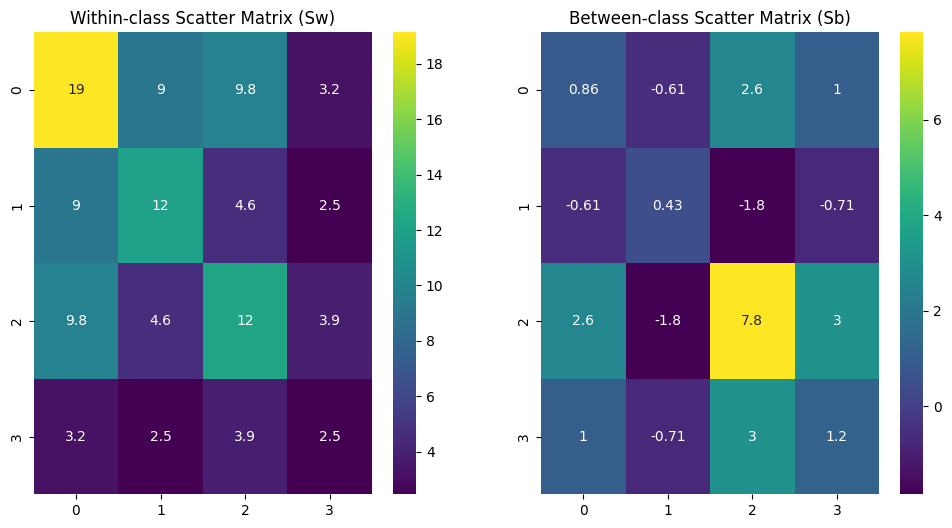

In [17]:
# Plotting the matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(Sw, ax=axes[0], annot=True, cmap='viridis', cbar=True)
axes[0].set_title('Within-class Scatter Matrix (Sw)')

sns.heatmap(Sb, ax=axes[1], annot=True, cmap='viridis', cbar=True)
axes[1].set_title('Between-class Scatter Matrix (Sb)')

plt.show()

In [16]:
# Solve the generalized eigenvalue problem for Sw^-1 Sb
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(Sw).dot(Sb))

# Sort the eigenvectors by eigenvalues in descending order
sorted_indices = np.argsort(eigvals)[::-1]
eigvecs = eigvecs[:, sorted_indices]
eigvals = eigvals[sorted_indices]

# The eigenvector corresponding to the largest eigenvalue
w = eigvecs[:, 0]

(w, eigvals[0])

(array([ 0.07278252,  0.4296938 , -0.51893802, -0.73537016]),
 1.053403488107275)

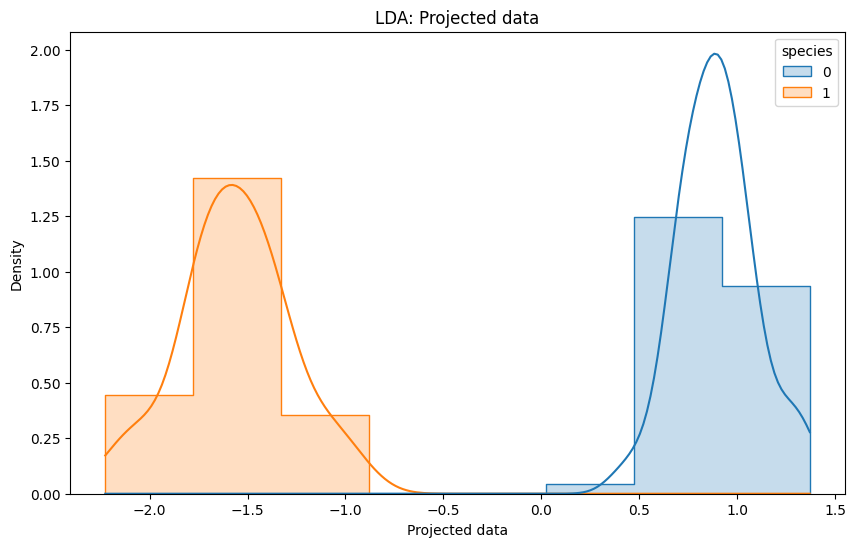

In [18]:
# Project the data onto the vector w
iris['projected'] = iris.iloc[:, :-1].dot(w)

# Plot the projected data
plt.figure(figsize=(10, 6))
sns.histplot(data=iris, x='projected', hue='species', kde=True, element='step', stat='density', common_norm=False)
plt.title('LDA: Projected data')
plt.xlabel('Projected data')
plt.ylabel('Density')
plt.show()